# **Importing libraries 📚 :**

In [ ]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import normalize
from sklearn import svm
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Depending on your normalization needs
from sklearn.impute import SimpleImputer  # For handling missing values
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **Download your dataset file from your local machine📥:**

In [ ]:
# Upload your dataset file from your local machine
uploaded = files.upload()

# Load the uploaded dataset into a Pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Display the entire DataFrame
display(df)

# **Data Exploration 🔍:**

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape #Row, columns

(3276, 10)

# **Feature Description 🧾:**

1. PH (Potentiel Hydrogène) : Mesure de l'acidité ou de la basicité de l'eau.

2. Hardness (Dureté) : Indique la concentration de minéraux, principalement de calcium et de magnésium, dans l'eau.

3. Solids (Solides) : Représente la quantité totale de solides dissous dans l'eau, y compris minéraux et substances organiques.

4. Chloramines (Chloramines) : Mesure la concentration de chloramines, des composés de chlore et d'ammoniac utilisés pour la désinfection de l'eau.

5. Sulfate (Sulfate) : Indique la concentration de sulfate dans l'eau.

6. Conductivity (Conductivité) : Mesure la capacité de l'eau à conduire l'électricité, liée à la présence de sels dissous.

7. Organic_carbon (Carbone organique) : Mesure la quantité de carbone organique dissous dans l'eau.

8. Trihalomethanes (Trihalométhanes) : Indique la concentration de trihalométhanes, des sous-produits de la désinfection de l'eau.

9. Turbidity (Turbidité) : Mesure le degré de trouble de l'eau causé par des particules en suspension.

10. Potability (Potabilité) : Indique si l'eau est considérée potable (1 pour oui, 0 pour non) en fonction de normes de qualité spécifiques.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


👉 The dataset consists of 1 column of integer data and 9 columns of floating-point data.

# **Data preprocessing:**

**Traitement des données manquantes et des doublons :**

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

👉 The dataset contains null values.

In [ ]:
df.duplicated().sum()

0

👉 There are no duplicate records present in the dataset.

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


👉 Function for preprocessing missing values

In [ ]:
def Imputation_of_missing_values_by_mean(df) :
  df['ph'].fillna(df['ph'].mean(), inplace=True)
  df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
  df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

def Imputation_of_missing_values_by_mode(df) :
  df['ph'].fillna(df['ph'].mode()[0], inplace=True)
  df['Sulfate'].fillna(df['Sulfate'].mode()[0], inplace=True)
  df['Trihalomethanes'].fillna(df['Trihalomethanes'].mode()[0], inplace=True)

def Imputation_of_missing_values_by_dropna(df):
   df.dropna(subset=['ph'], inplace=True)
   df.dropna(subset=['Sulfate'], inplace=True)
   df.dropna(subset=['Trihalomethanes'], inplace=True)

👉 Selection of missing value imputation technique

In [ ]:
print("1: Preprocessing: Mode usage")
print("2: Preprocessing: Mean usage")
print("3: Preprocessing: Dropna usage")
missing_value_choice = int(input("Select preprocessing: "))

if(missing_value_choice==1):
  Imputation_of_missing_values_by_mean(df)
if(missing_value_choice==2):
  Imputation_of_missing_values_by_mean(df)
if(missing_value_choice==3):
  Imputation_of_missing_values_by_dropna(df)

1 : pretraitment : utilisation de mode
2 : pretraitment : utilisation de mean
3 : pretraitment : utilisation de dropna
selectionner pretraitment 2


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **Normalisation :**

👉 Normalization function

In [ ]:
def Normalisation_by_Min_Max(df):
  min_max_scaler = MinMaxScaler()
  df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]] = min_max_scaler.fit_transform(df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]])
def Normalisation_by_Zscore(df):
  z_scaler = StandardScaler()
  df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]] = z_scaler.fit_transform(df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]])
def Robust_normalization(df):
  robust_scaler = RobustScaler()
  df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]] = robust_scaler.fit_transform(df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]])
def Normalization_by_sum(df):
  df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]] = df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]].div(df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]].sum(axis=1), axis=0)
def Normalization_by_vectorization(df):
  df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]] = normalize(df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]], norm='l2')
def Normalization_by_log(df):
  df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]] = np.log1p(df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]])
def Normalization_by_square_root(df):
  df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]] = np.sqrt(df[["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]])


👉 Selection of normalization technique

In [ ]:
print("1: Min-Max Normalization")
print("2: Z-score Normalization")
print("3: Robust Normalization")
print("4: Sum Normalization")
print("5: Vector Normalization")
print("6: Log-Transformation Normalization")
print("7: Square Root Normalization")
Normalization_choice=int(input("Choose preprocessing method: "))

if(Normalization_choice==1):
  Normalisation_by_Min_Max(df)
if(Normalization_choice==2):
  Normalisation_by_Zscore(df)
if(Normalization_choice==3):
  Robust_normalization(df)
if(Normalization_choice==4):
  Normalization_by_sum(df)
if(Normalization_choice==5):
  Normalization_by_vectorization(df)
if(Normalization_choice==6):
  Normalization_by_log(df)
if(Normalization_choice==7):
  Normalization_by_square_root(df)

1 : Normalisation Min-Max
2 : Normalisation Z
3 : Normalisation Robuste
4 : Normalisation par somme
5 : Normalisation vectorielle
6 : Normalisation par log-transformation
7 : Normalisation par racine carrée
selectionner pretraitment 6


# **Data Visualization 📊:**

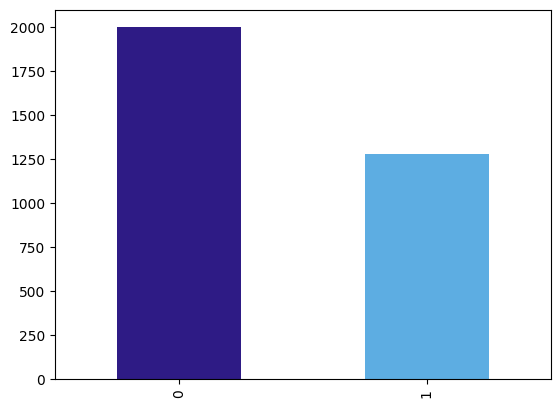

In [ ]:
df['Potability'].value_counts().plot(kind="bar", color=["#2e1b85", "#5dade2"])
plt.show()

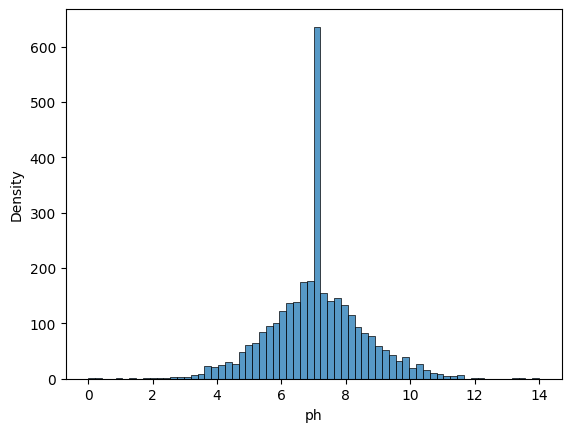

In [ ]:
sns.histplot(df['ph'])
plt.xlabel('ph')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609:

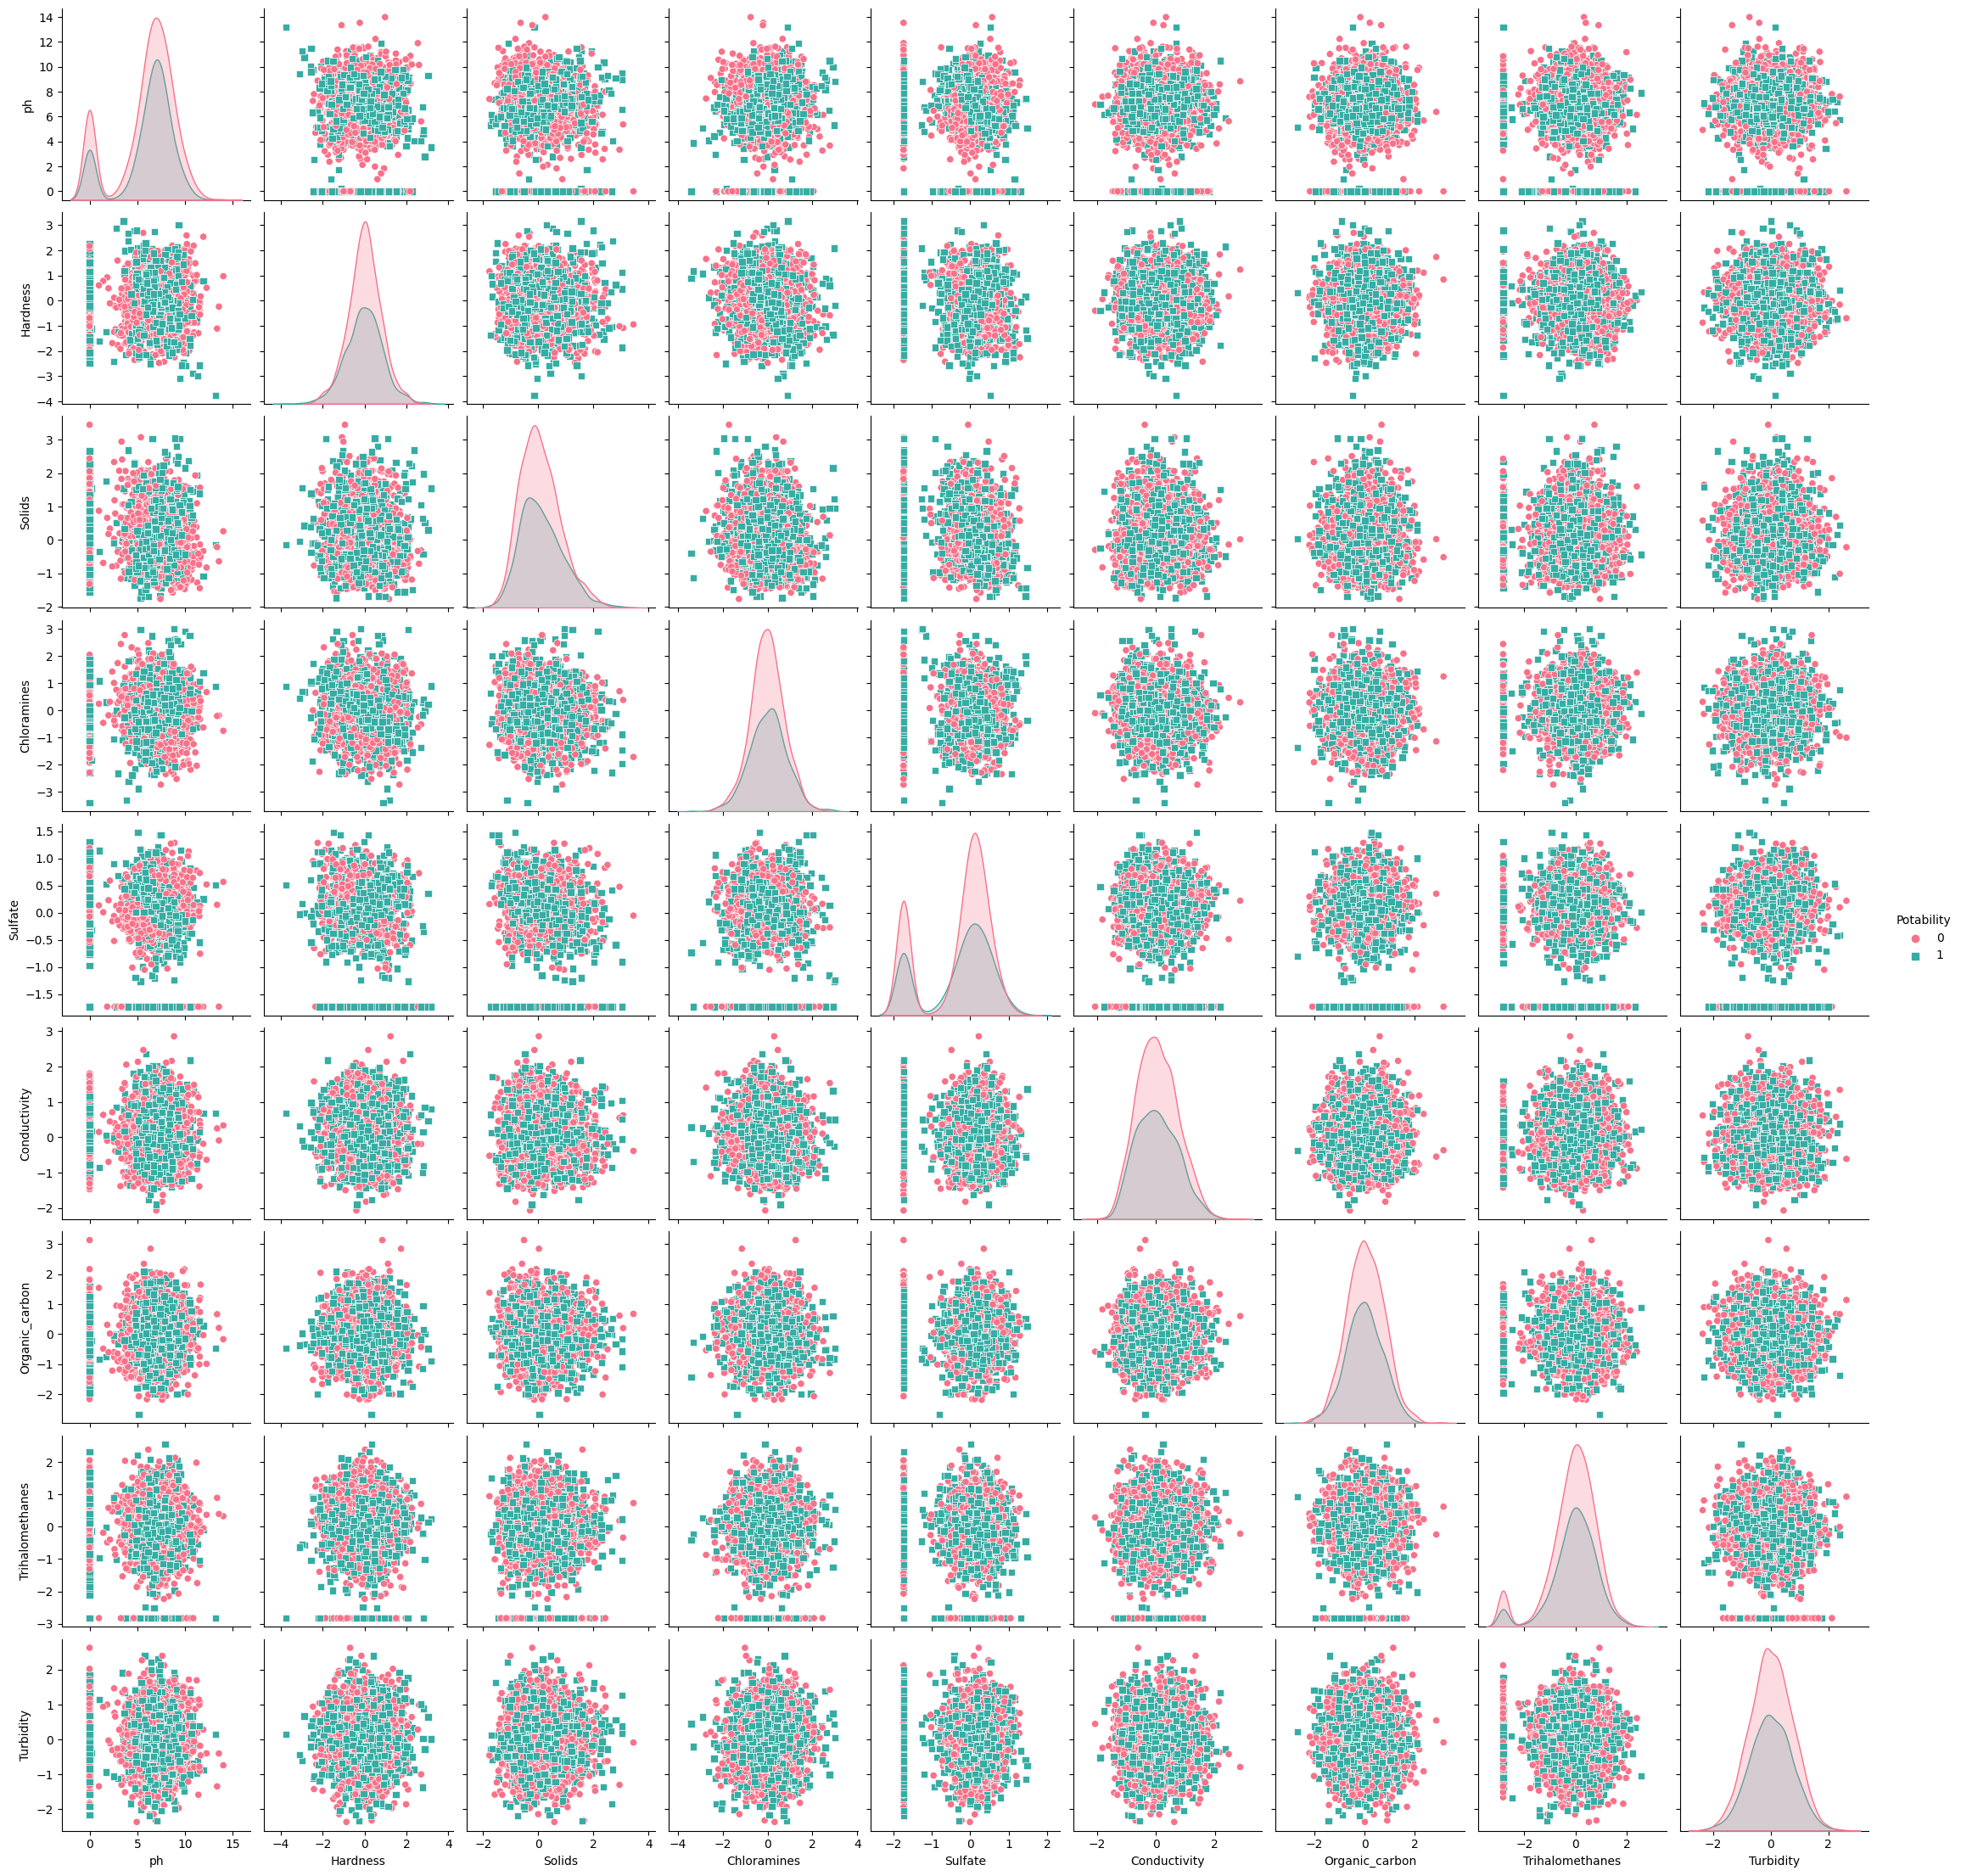

In [ ]:
sns.pairplot(df, hue="Potability", palette="husl", markers=["o", "s", "D"])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

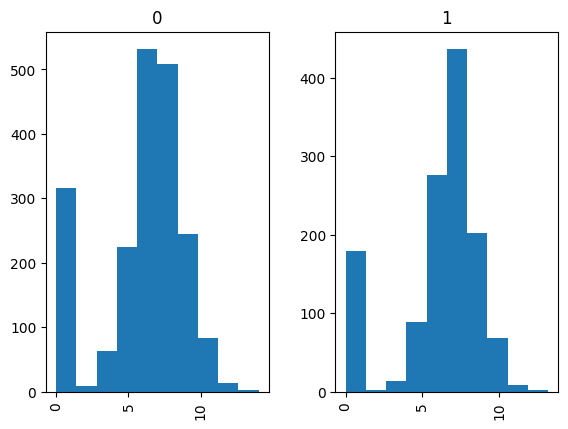

In [ ]:
df.hist(column = 'ph', by = 'Potability')

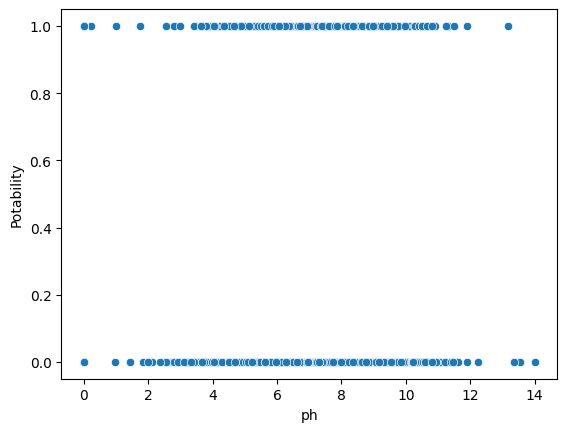

In [ ]:
sns.scatterplot(x=df['ph'],y=df['Potability'])
plt.show()

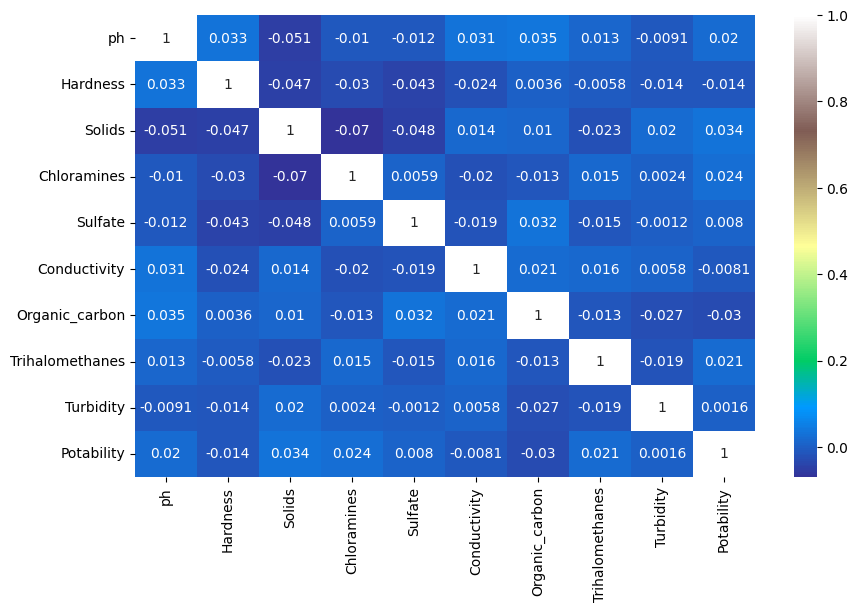

In [ ]:
# create a correlation heatmap
sns.heatmap(df.corr(), annot = True, cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

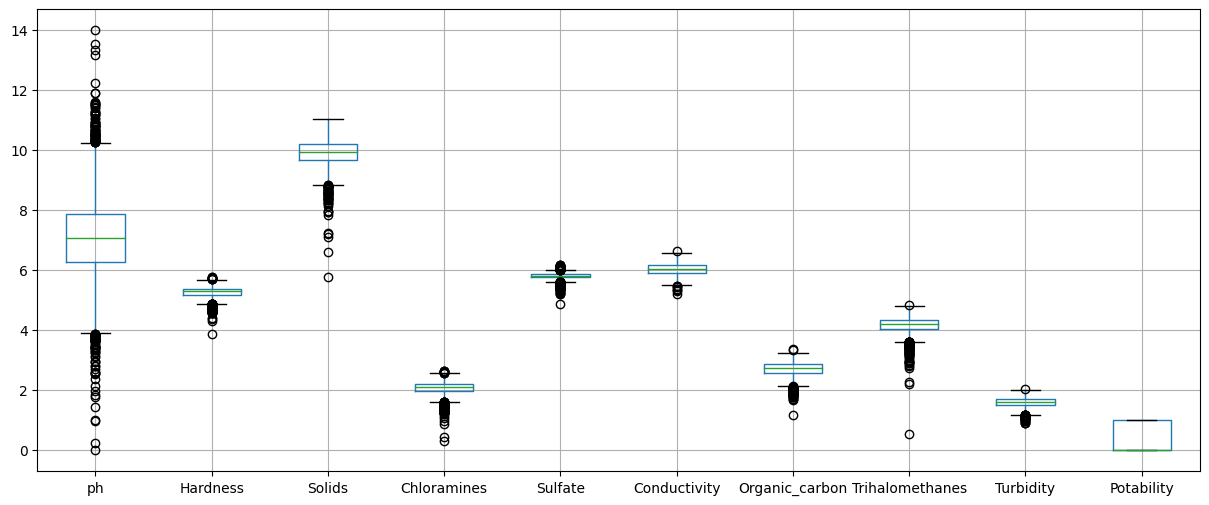

In [ ]:
df.boxplot(figsize=(15,6))
plt.show()

👉 We have decided not to remove the outliers as they may play a crucial role in assessing water quality.

# ****Applying ML Algorithms ✅****

👉 Processing Function

In [ ]:
def KNN_treatment(df):
      X = df.drop("Potability", axis=1)
      y = df['Potability']
      # Split your data into training and testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
      # Standardize your feature data (recommended for KNN)
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)
      # Create and train a KNN model on the training data
      k = 3  # You can choose the number of neighbors (k) based on your requirements
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(X_train, y_train)
      # Make predictions on the test data
      y_pred = model.predict(X_test)
      # Calculate accuracy
      accuracy = accuracy_score(y_test, y_pred)
      print(f"Accuracy of KNN with {k} neighbors: {accuracy * 100:.2f}%")
      # Calculate precision
      precision = precision_score(y_test, y_pred)
      print(f"Precision of KNN with {k} neighbors: {precision * 100:.2f}%")
      # Calculate recall
      recall = recall_score(y_test, y_pred)
      print(f"Recall of KNN with {k} neighbors: {recall * 100:.2f}%")

def SVM_treatment(df):
  X = df.drop('Potability', axis=1)
  y = df['Potability']
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Create an SVM model
  model = svm.SVC(kernel='linear')
  # Train the model on the training set
  model.fit(X_train, y_train)
  # Make predictions on the test set
  predictions = model.predict(X_test)
  # Calculate accuracy
  accuracy = accuracy_score(y_test, predictions)
  print(f'Model Accuracy : {accuracy * 100:.2f}%')
  # Calculate precision
  precision = precision_score(y_test, predictions)
  print(f'Precision : {precision * 100:.2f}%')
  # Calculate recall
  recall = recall_score(y_test, predictions)
  print(f'Recall : {recall * 100:.2f}%')

def RandomForest_treatment(df):
  X = df.drop('Potability', axis=1)
  y = df['Potability']
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Create a Random Forest model
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  # Train the model on the training set
  model.fit(X_train, y_train)
  # Make predictions on the test set
  predictions = model.predict(X_test)
  # Calculate model accuracy
  accuracy = accuracy_score(y_test, predictions)
  print(f'Model Accuracy : {accuracy * 100:.2f}%')
  # Calculate precision
  precision = precision_score(y_test, predictions, average='weighted')
  print(f'Precision : {precision * 100:.2f}%')
  # Calculate recall
  recall = recall_score(y_test, predictions, average='weighted')
  print(f'Recall : {recall * 100:.2f}%')

def LogisticRegression_treatment(df):
  X = df.drop('Potability', axis=1)
  y = df['Potability']
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Create a Logistic Regression model
  model = LogisticRegression()
  # Train the model on the training set
  model.fit(X_train, y_train)
  # Make predictions on the test set
  predictions = model.predict(X_test)
  # Calculate accuracy
  accuracy = accuracy_score(y_test, predictions)
  print(f'Model Accuracy : {accuracy * 100:.2f}%')
  # Calculate precision
  precision = precision_score(y_test, predictions, average='weighted')
  print(f'Precision : {precision * 100:.2f}%')
  # Calculate recall
  recall = recall_score(y_test, predictions, average='weighted')
  print(f'Recall : {recall * 100:.2f}%')

def NaiveBayes_treatment(df):
  imputer = SimpleImputer(strategy='mean')
  df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
  # Separate features (X) and labels (y)
  X = df.drop('Potability', axis=1)
  y = df['Potability']
  # Standardize features (optional but often recommended for Naive Bayes)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Train the Gaussian Naive Bayes model
  model = GaussianNB()
  model.fit(X_train, y_train)
  # Make predictions on the test set
  predictions = model.predict(X_test)
  # Evaluate the model
  accuracy = accuracy_score(y_test, predictions)
  print(f'Accuracy: {accuracy * 100:.2f}%')
  # Calculate precision
  precision = precision_score(y_test, predictions, average='weighted')
  print(f'Precision : {precision * 100:.2f}%')
  # Calculate recall
  recall = recall_score(y_test, predictions, average='weighted')
  print(f'Recall : {recall * 100:.2f}%')

def DecisionTree_treatment(df):
    X = df.drop('Potability', axis=1)
    y = df['Potability']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
    # Create a Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    # Train the model on the training set
    model.fit(X_train, y_train)
    # Make predictions on the test set
    predictions = model.predict(X_test)
    # Calculate model accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'Model Accuracy : {accuracy * 100:.2f}%')
    # Calculate precision
    precision = precision_score(y_test, predictions, average='weighted')
    print(f'Precision : {precision * 100:.2f}%')
    # Calculate recall
    recall = recall_score(y_test, predictions, average='weighted')
    print(f'Recall : {recall * 100:.2f}%')

def GradientBoosting_treatment(df):
    X = df.drop('Potability', axis=1)
    y = df['Potability']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
    # Create a Gradient Boosting Classifier model
    model = GradientBoostingClassifier(random_state=42)
    # Train the model on the training set
    model.fit(X_train, y_train)
    # Make predictions on the test set
    predictions = model.predict(X_test)
    # Calculate model accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'Model Accuracy : {accuracy * 100:.2f}%')
    # Calculate precision
    precision = precision_score(y_test, predictions, average='weighted')
    print(f'Precision : {precision * 100:.2f}%')
    # Calculate recall
    recall = recall_score(y_test, predictions, average='weighted')
    print(f'Recall : {recall * 100:.2f}%')


👉 Selection of processing algorithms

In [ ]:
print("1 : KNN")
print("2 : Naive Bayes")
print("3 : SVM")
print("4 : Random forest")
print("5 : regression logistique")
print("6 : Decision Tree")
print("7 : Gradient Boosting Classifier")

treatment_choice=int(input("Select preprocessing."))

if(treatment_choice==1):
  KNN_treatment(df)
if(treatment_choice==2):
  NaiveBayes_treatment(df)
if(treatment_choice==3):
  SVM_treatment(df)
if(treatment_choice==4):
  RandomForest_treatment(df)
if(treatment_choice==5):
  LogisticRegression_treatment(df)
if(treatment_choice==6):
    DecisionTree_treatment(df)
if(treatment_choice==7):
    GradientBoosting_treatment(df)




1 : KNN
2 : Naive Bayes
3 : SVM
4 : Random forest
5 : regression logistique
6 : Decision Tree
7 : Gradient Boosting Classifier
selectionner pretraitment 1
Accuracy of KNN with 3 neighbors: 61.86%
Precision of KNN with 3 neighbors: 48.31%
Recall of KNN with 3 neighbors: 42.70%
